# Image compression through Singular Value Decomposition

Load a picture as a 3-dimensional `np.array`

When you load an image using Matplotlib, it's internally represented as a NumPy array. The dimensionality of the array depends on the type of image.

- For grayscale images, each pixel is represented by a single intensity value, so the array will be 2-dimensional. The shape of the array will be (height, width).

- For color images, each pixel is represented by multiple intensity values (e.g., Red, Green, Blue), so the array will be 3-dimensional. The shape of the array will be (height, width, 3), where the last dimension represents the color channels.

The values in the NumPy array represent the pixel intensities. For grayscale images, the values can range from 0 (black) to 255 (white), and for color images, the values can range from 0 to 255 for each color channel ***(RGB)***.

For example, if you load a color image using Matplotlib, the resulting NumPy array will have three dimensions, where the third dimension represents the Red, Green, and Blue color channels.

### Importing an image

(567, 630, 3)


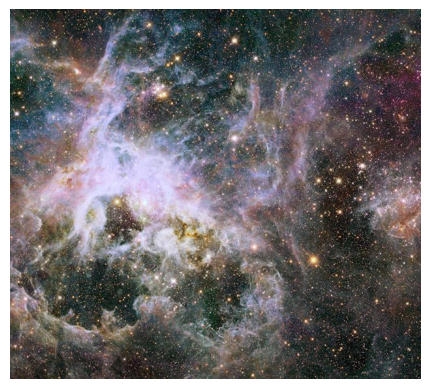

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
# Load a color image from an external file
img = mpimg.imread('TarantulaNebula.jpg')

# Check the dimensions of the array
print(img.shape)  # This will print the dimensions of the array

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

### Converting it in grey-scale

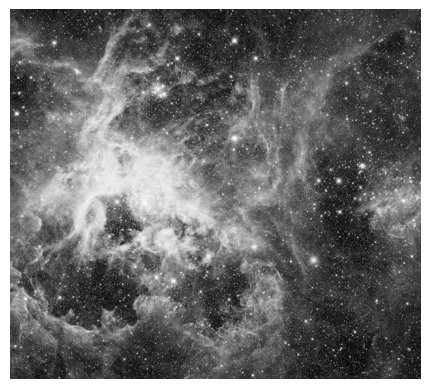

In [2]:
X = np.mean(img, axis=2) #calculating the Mean on elements of third axis, combining intensity of values of 3rd axis
image_grey = plt.imshow(X)
plt.axis('off')
image_grey.set_cmap('gray')

### SVD Decomposition

In [9]:
import scipy.linalg as la
U, s ,VT = np.linalg.svd(X, full_matrices=False)
print(U.shape)
print(s.shape)
print(VT.shape)
#S = la.diagsvd(s, X.shape[0], X.shape[1])   #build 'S', diagonal matrix with singular values,
                                            #with (matrix, number of rows, number of columns)
S = np.diag(s)
X_svd = np.dot(U, np.dot(S,VT))
print('err: %e' % (la.norm(X - X_svd) / la.norm(X)))


(567, 567)
(567,)
(567, 630)
err: 3.895293e-15


### Singular Values trends
Plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Text(0.5, 1.0, 'Explained variance')

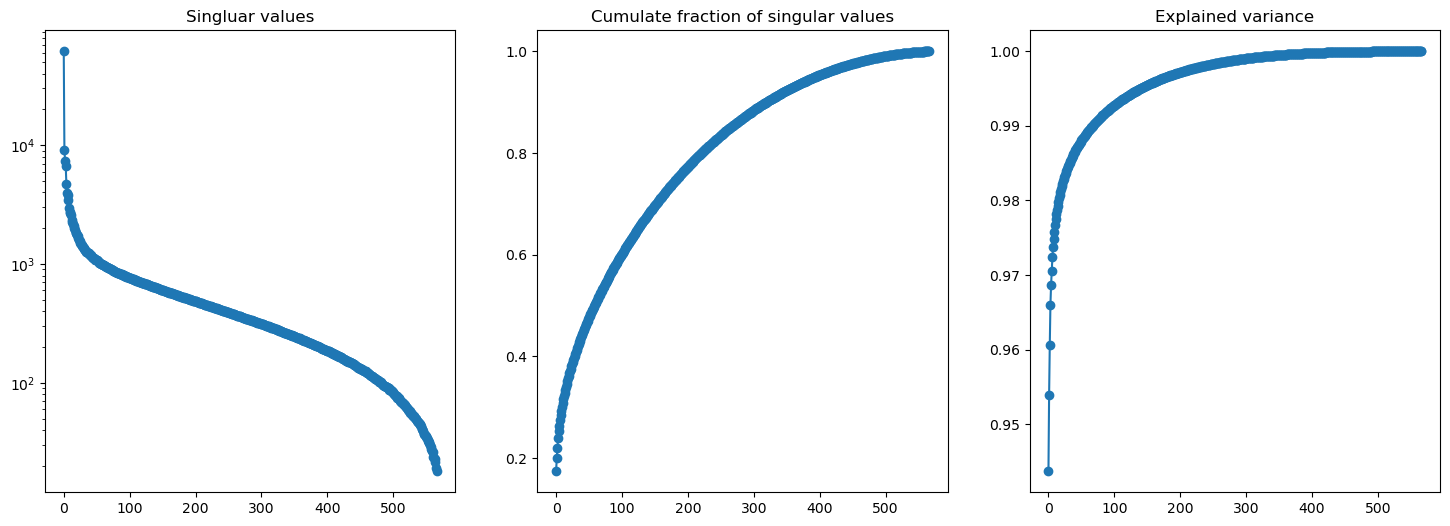

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (18,6))

axes[0].semilogy(s, 'o-')
axes[0].set_title('Singluar values')

axes[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axes[1].set_title('Cumulate fraction of singular values')

axes[2].plot(np.sqrt(np.cumsum(s**2)/np.sum(s**2)), 'o-')
axes[2].set_title('Explained variance')

### Best k-rank matrices
Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500

Approximating images with different values of k using the SVD means approximating the original image using only the first k singular values and their associated singular vectors. This process allows for the approximation of the original image with a simplified version, utilizing a reduced amount of information.

In SVD, the original matrix is decomposed into three main components: the unitary matrices U and VT, and a diagonal matrix S containing the singular values. By reducing the number of singular values considered (represented by k), it is possible to obtain an approximate version of the original image, capturing only the most significant and relevant components of the image.

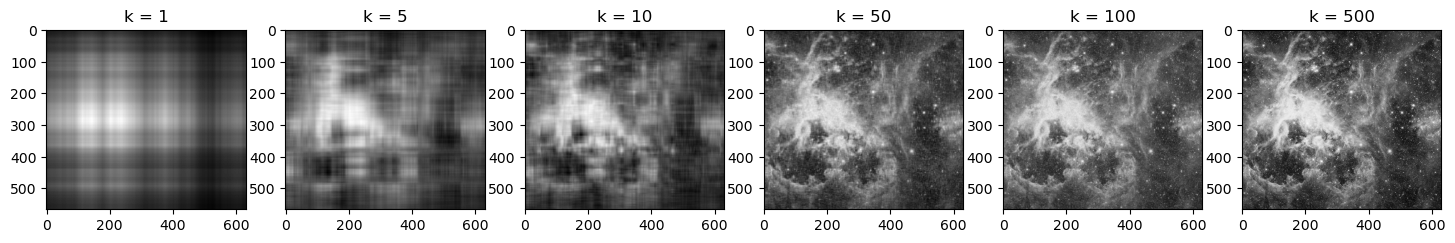

In [14]:
fig, axs = plt.subplots(nrows = 1, ncols = 6, figsize = (18,12))
axs.reshape((-1,))
idxs = [1, 5, 10, 50, 100 , 500]
plt.set_cmap('gray')
for i in range(len(idxs)):
    k = idxs[i]
    X_k = np.matmul(U[:, :k], np.matmul(np.diag(s[:k]), VT[:k, :]))
    axs[i].imshow(X_k)
    axs[i].set_title("k = "+str(k))
    #axs[i].axis['off']
    

### K-th rank-1 matrix

The rank-1 approximation of a matrix involves representing the original matrix with a lower-rank matrix, specifically a matrix with only one non-zero singular value. This approximation is a simple and often useful way to understand and reduce the complexity of a given matrix, particularly in the context of singular value decomposition (SVD).

For a matrix $A$ of size $m * n$, the rank-1 approximation is obtained using the SVD decomposition as:

$A$ $approx$ $\sigma_1$ $u_1$ $v_1^T$ 

where $\sigma_1$ is the largest singular value, $u_1$ is the corresponding left singular vector, and $v_1^T$  is the corresponding right singular vector. This rank-1 approximation captures the most significant singular value and its associated vectors, which are essential in representing the primary structure of the original matrix. 


***Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6***

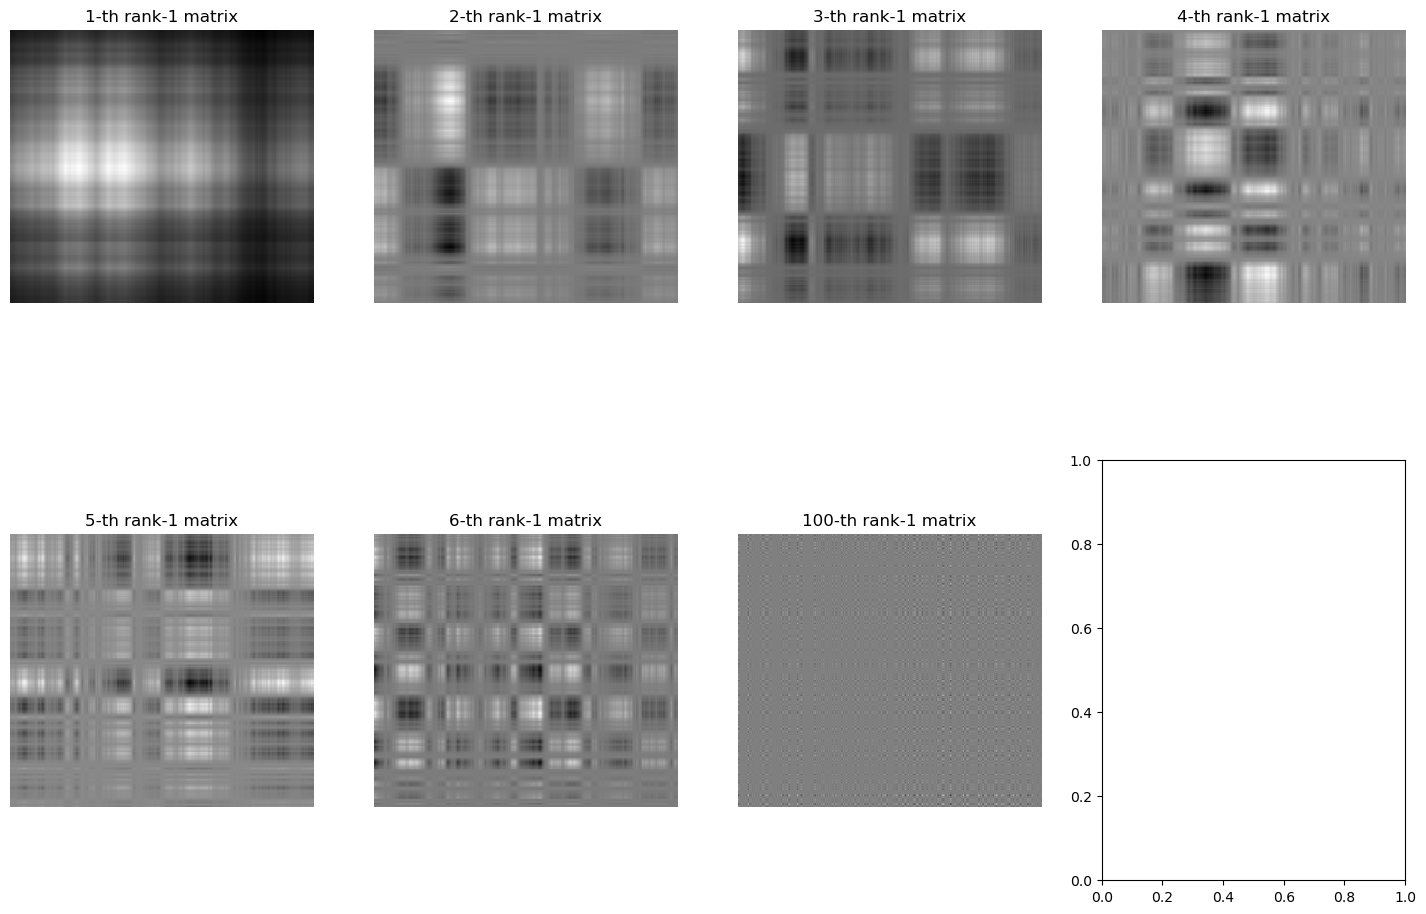

In [8]:
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (18,12))
axs = axs.reshape((-1,))
idxs = [1,2,3,4,5,6,100]
for i in range(len(idxs)):
  k = idxs[i]
  ukvk = np.outer(U[:,k - 1], VT[k - 1,:]) #Computes the rank-1 approximation ukvk by taking 
                                            #the outer product of the k-th columns of U and the k-th rows of VT.
  axs[i].imshow(ukvk)
  axs[i].set_title('%d-th rank-1 matrix' % k)
  axs[i].axis('off')
  plt.set_cmap('gray')